## Uni-Modal Image Sequence Classifier Base Model

In [1]:
import numpy as np
from collections import Counter
from sklearn import model_selection, metrics
import tensorflow
from tensorflow import keras
import pandas as pd
import os
import PIL
import sklearn
from matplotlib import pyplot as plt

In [2]:
from utils import data_utils, model_utils, models

In [3]:
tensorflow.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

### Load & Pre-Process Data

In [4]:
label_map = {
    'geol_geow': 0, 
    'geol_sed': 1, 
    'gphys_gen': 2, 
    'log_sum': 3, 
    'pre_site': 4, 
    'vsp_file': 5
}

### Page Image Classifier - CNN

In [ ]:
doc_data = data_utils.DocumentData(label_map, 2020, drop_nans='image')
doc_data.load_image_data(image_size=200, n_pages=1)

In [129]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode='min', restore_best_weights=True)

In [130]:
cnn = models.image_cnn_model()

In [1]:
history = cnn.fit(doc_data.image_train, doc_data.y_train, epochs=400, validation_data=(doc_data.image_val, doc_data.y_val), callbacks=[early_stopping])

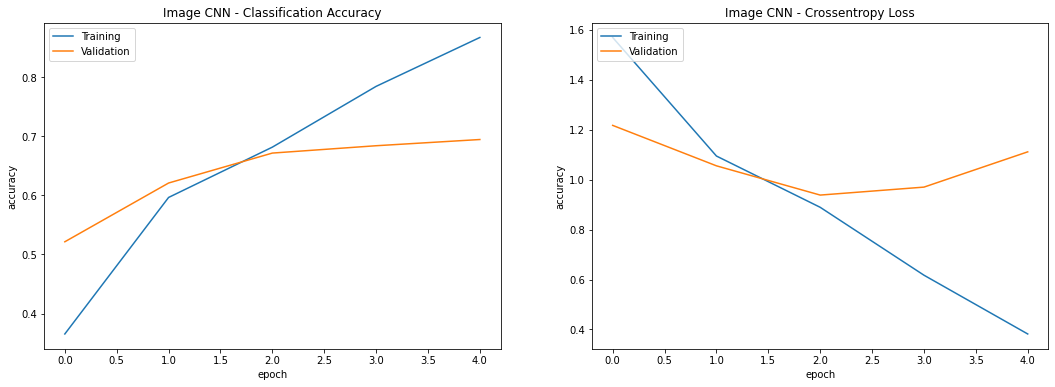

In [10]:
model_utils.plot_history(history, 'Image CNN')

In [17]:
cnn.evaluate(doc_data.image_test, doc_data.y_test)

41/41 [==============================] - 0s 12ms/step - loss: 0.8873 - accuracy: 0.6998


[0.887333869934082, 0.6998468637466431]

In [12]:
y_probs = cnn.predict(doc_data.image_test)
y_hat = np.argmax(y_probs, axis=-1)

In [13]:
y = np.argmax(doc_data.y_test, axis=-1)

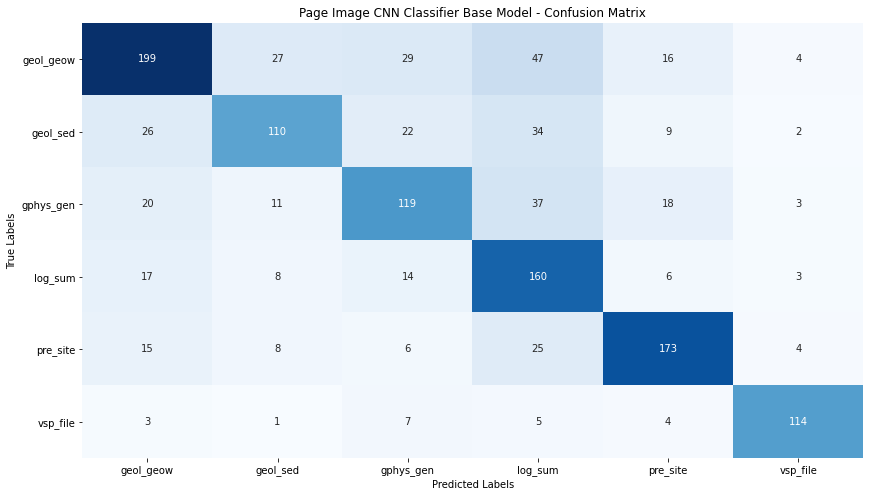

In [14]:
model_utils.confusion_matrix(y, y_hat, label_map, 'Page Image CNN Classifier Base Model')

In [15]:
labels = [label for label in label_map]
print(metrics.classification_report(y, y_hat, target_names=labels))

              precision    recall  f1-score   support

   geol_geow       0.71      0.62      0.66       322
    geol_sed       0.67      0.54      0.60       203
   gphys_gen       0.60      0.57      0.59       208
     log_sum       0.52      0.77      0.62       208
    pre_site       0.77      0.75      0.76       231
    vsp_file       0.88      0.85      0.86       134

    accuracy                           0.67      1306
   macro avg       0.69      0.68      0.68      1306
weighted avg       0.68      0.67      0.67      1306



In [16]:
average_metrics = model_utils.iterate_training(models.image_cnn_model, doc_data, 10, y, data_type='image')

---- Training model iteration 0:
Epoch 1/100
131/131 - 3s - loss: 1.6612 - accuracy: 0.3086 - val_loss: 1.4126 - val_accuracy: 0.4785
Epoch 2/100
131/131 - 3s - loss: 1.2778 - accuracy: 0.4977 - val_loss: 1.1669 - val_accuracy: 0.5512
Epoch 3/100
131/131 - 3s - loss: 1.0560 - accuracy: 0.6117 - val_loss: 1.0498 - val_accuracy: 0.6335
Epoch 4/100
131/131 - 3s - loss: 0.8627 - accuracy: 0.6864 - val_loss: 1.0259 - val_accuracy: 0.6354
Epoch 5/100
131/131 - 3s - loss: 0.6705 - accuracy: 0.7611 - val_loss: 1.0353 - val_accuracy: 0.6794
Epoch 6/100
131/131 - 3s - loss: 0.4896 - accuracy: 0.8315 - val_loss: 1.1527 - val_accuracy: 0.6861
41/41 [==============================] - 0s 11ms/step - loss: 1.0173 - accuracy: 0.6554
Metrics at convergence: Loss: 1.0173004865646362, accuracy: 0.6554364562034607, f1 score: 0.6728920980079973

---- Training model iteration 1:
Epoch 1/100
131/131 - 3s - loss: 1.6082 - accuracy: 0.3321 - val_loss: 1.3901 - val_accuracy: 0.4651
Epoch 2/100
131/131 - 3s - lo

In [17]:
average_metrics

{'ave_precision': 0.6937402189720782,
 'ave_recall': 0.6838782025729596,
 'ave_f1_score': 0.6843003225331589,
 'ave_accuracy': 0.6705206751823425,
 'ave_loss': 0.9672341048717499}

### Page Image Classifier - CNN (Multipage)

##### Load multi-page data

In [152]:
doc_data = data_utils.DocumentData(label_map, 2020, drop_nans='image')
doc_data.load_image_data(image_size=200, n_pages=10, sequential=True)

In [153]:
y_train = doc_data.y_train
y_val = doc_data.y_val
y_test = doc_data.y_test

doc_data.y_train = model_utils.multi_y(doc_data.y_train)
doc_data.y_val = model_utils.multi_y(doc_data.y_val)
doc_data.y_test = model_utils.multi_y(doc_data.y_test)

##### Build and train multi-page CNN model

In [176]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode='min', restore_best_weights=True)

In [27]:
cnn = models.image_cnn_model()

In [178]:
history = cnn.fit(doc_data.image_train, doc_data.y_train, epochs=400, validation_data=(doc_data.image_val, doc_data.y_val), callbacks=[early_stopping])

Epoch 1/400
1306/1306 [==============================] - 42s 32ms/step - loss: 1.4654 - accuracy: 0.4014 - val_loss: 1.2954 - val_accuracy: 0.4760
Epoch 2/400
1306/1306 [==============================] - 26s 20ms/step - loss: 1.2406 - accuracy: 0.5005 - val_loss: 1.2345 - val_accuracy: 0.5076
Epoch 3/400
1306/1306 [==============================] - 25s 19ms/step - loss: 1.1025 - accuracy: 0.5540 - val_loss: 1.2693 - val_accuracy: 0.5117
Epoch 4/400
1306/1306 [==============================] - 25s 19ms/step - loss: 0.9863 - accuracy: 0.5981 - val_loss: 1.3505 - val_accuracy: 0.5166


In [179]:
cnn.evaluate(doc_data.image_test, doc_data.y_test)

409/409 [==============================] - 4s 11ms/step - loss: 1.3035 - accuracy: 0.4847


[1.30353581905365, 0.48468607664108276]

In [180]:
y_pred = cnn.predict(doc_data.image_test)

In [181]:
y_hat = np.argmax(y_pred, axis=-1)

In [182]:
y = np.argmax(doc_data.y_test, axis=-1)

In [183]:
labels = [label for label in label_map]
print(metrics.classification_report(y, y_hat, target_names=labels))

              precision    recall  f1-score   support

   geol_geow       0.64      0.63      0.64      3220
    geol_sed       0.65      0.37      0.47      2030
   gphys_gen       0.62      0.22      0.32      2080
     log_sum       0.29      0.87      0.43      2080
    pre_site       0.67      0.28      0.40      2310
    vsp_file       0.90      0.46      0.61      1340

    accuracy                           0.48     13060
   macro avg       0.63      0.47      0.48     13060
weighted avg       0.62      0.48      0.48     13060



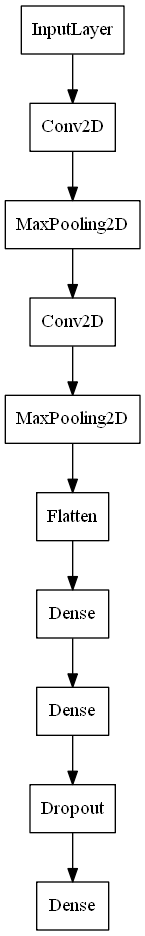

In [28]:
keras.utils.plot_model(cnn, show_layer_names=False)

#### Majority Vote Method

In [184]:
predicted_votes = model_utils.majority_vote(y_pred)

In [185]:
y = np.argmax(y_test, axis=-1)

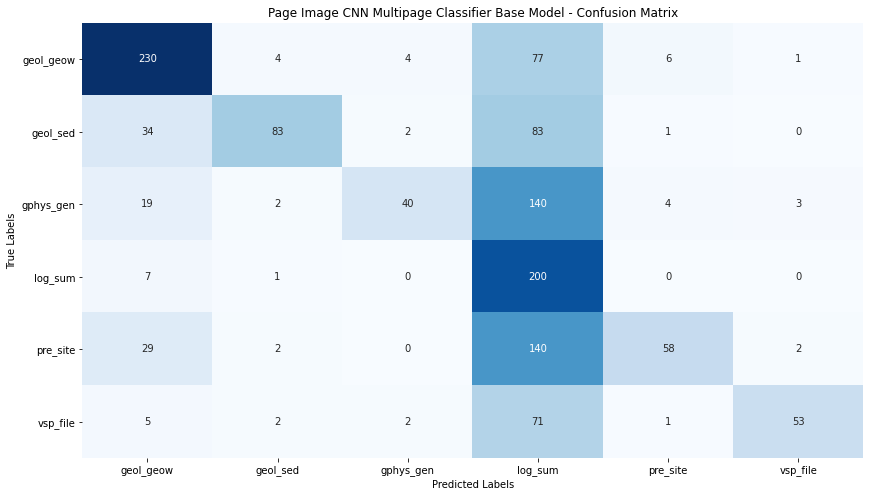

In [186]:
model_utils.confusion_matrix(y, predicted_votes, label_map, 'Page Image CNN Multipage Classifier Base Model')

In [187]:
labels = [label for label in label_map]
print(metrics.classification_report(y, predicted_votes, target_names=labels))

              precision    recall  f1-score   support

   geol_geow       0.71      0.71      0.71       322
    geol_sed       0.88      0.41      0.56       203
   gphys_gen       0.83      0.19      0.31       208
     log_sum       0.28      0.96      0.44       208
    pre_site       0.83      0.25      0.39       231
    vsp_file       0.90      0.40      0.55       134

    accuracy                           0.51      1306
   macro avg       0.74      0.49      0.49      1306
weighted avg       0.73      0.51      0.51      1306



#### ANN Aggregation

In [188]:
train_probs = cnn.predict(doc_data.image_train)
train_probs = model_utils.aggregate_probabilities(train_probs)

In [189]:
predicted_val = cnn.predict(doc_data.image_val)
predicted_val = model_utils.aggregate_probabilities(predicted_val)

In [190]:
predicted_test = cnn.predict(doc_data.image_test)
predicted_test = model_utils.aggregate_probabilities(predicted_test)

In [21]:
input_layer = keras.layers.Input(shape=60)
dense1 = keras.layers.Dense(10, activation='relu')(input_layer)
output = keras.layers.Dense(6, activation='softmax')(dense1)

ann = keras.models.Model(inputs=[input_layer], outputs=[output])
ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

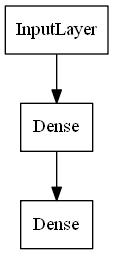

In [26]:
keras.utils.plot_model(ann, show_layer_names=False, rankdir='TB')

In [192]:
ann.fit(train_probs, y_train, epochs=400, validation_data=(predicted_val, y_val), callbacks=[early_stopping])

Epoch 1/400
131/131 [==============================] - 1s 4ms/step - loss: 1.5537 - accuracy: 0.5006 - val_loss: 1.3946 - val_accuracy: 0.6679
Epoch 2/400
131/131 [==============================] - 0s 4ms/step - loss: 1.1281 - accuracy: 0.7898 - val_loss: 1.0951 - val_accuracy: 0.7120
Epoch 3/400
131/131 [==============================] - 0s 3ms/step - loss: 0.8400 - accuracy: 0.8078 - val_loss: 0.9263 - val_accuracy: 0.7301
Epoch 4/400
131/131 [==============================] - 0s 4ms/step - loss: 0.6666 - accuracy: 0.8262 - val_loss: 0.8497 - val_accuracy: 0.7435
Epoch 5/400
131/131 [==============================] - 0s 3ms/step - loss: 0.5749 - accuracy: 0.8353 - val_loss: 0.8196 - val_accuracy: 0.7435
Epoch 6/400
131/131 [==============================] - 0s 3ms/step - loss: 0.5241 - accuracy: 0.8437 - val_loss: 0.8126 - val_accuracy: 0.7359
Epoch 7/400
131/131 [==============================] - 0s 3ms/step - loss: 0.4938 - accuracy: 0.8499 - val_loss: 0.8019 - val_accuracy: 0.7426

In [193]:
ann.evaluate(predicted_test, y_test)

41/41 [==============================] - 0s 3ms/step - loss: 0.8428 - accuracy: 0.7305


[0.8427523374557495, 0.7304747104644775]

In [194]:
y_probs = ann.predict(predicted_test)
y_hat = np.argmax(y_probs, axis=-1)

In [195]:
y = np.argmax(y_test, axis=-1)

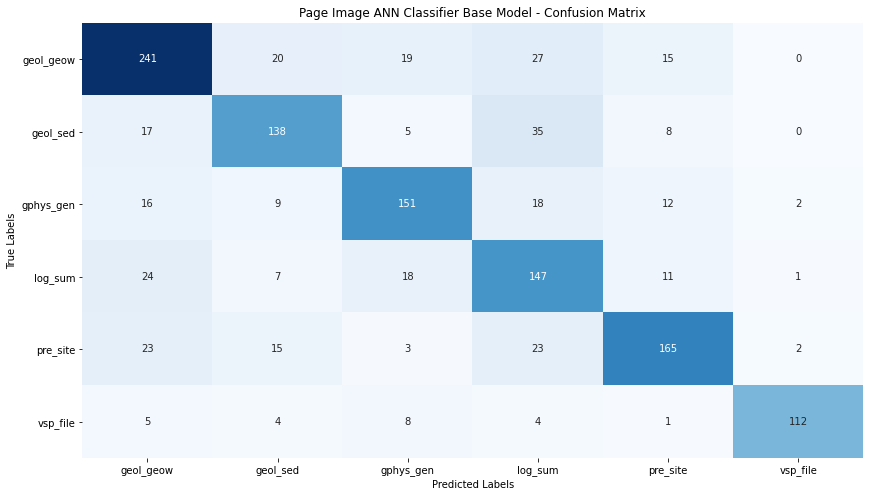

In [196]:
model_utils.confusion_matrix(y, y_hat, label_map, 'Page Image ANN Classifier Base Model')

In [197]:
labels = [label for label in label_map]
print(metrics.classification_report(y, y_hat, target_names=labels))

              precision    recall  f1-score   support

   geol_geow       0.74      0.75      0.74       322
    geol_sed       0.72      0.68      0.70       203
   gphys_gen       0.74      0.73      0.73       208
     log_sum       0.58      0.71      0.64       208
    pre_site       0.78      0.71      0.74       231
    vsp_file       0.96      0.84      0.89       134

    accuracy                           0.73      1306
   macro avg       0.75      0.74      0.74      1306
weighted avg       0.74      0.73      0.73      1306



### Page Image Sequence Classifier - LSTM CNN

In [5]:
doc_data = data_utils.DocumentData(label_map, 2020, drop_nans='image')
doc_data.load_image_data(image_size=200, n_pages=10)

##### Build CNN LSTM page image sequence classifier

In [10]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode='min', restore_best_weights=True)

In [14]:
lstm_cnn = models.image_cnn_lstm_model()

In [15]:
history = lstm_cnn.fit(doc_data.image_train, doc_data.y_train, epochs=400, validation_data=(doc_data.image_val, doc_data.y_val), callbacks=[early_stopping])

Epoch 1/400
131/131 [==============================] - 49s 370ms/step - loss: 1.6318 - accuracy: 0.3534 - val_loss: 1.4465 - val_accuracy: 0.4450
Epoch 2/400
131/131 [==============================] - 22s 169ms/step - loss: 1.3582 - accuracy: 0.4654 - val_loss: 1.2860 - val_accuracy: 0.5225
Epoch 3/400
131/131 [==============================] - 21s 162ms/step - loss: 1.2484 - accuracy: 0.5042 - val_loss: 1.3351 - val_accuracy: 0.5646
Epoch 4/400
131/131 [==============================] - 21s 163ms/step - loss: 1.2425 - accuracy: 0.5243 - val_loss: 1.3497 - val_accuracy: 0.4612


In [13]:
lstm_cnn.evaluate(doc_data.image_test, doc_data.y_test)

41/41 [==============================] - 3s 83ms/step - loss: 0.8374 - accuracy: 0.7113


[0.837397575378418, 0.7113323211669922]

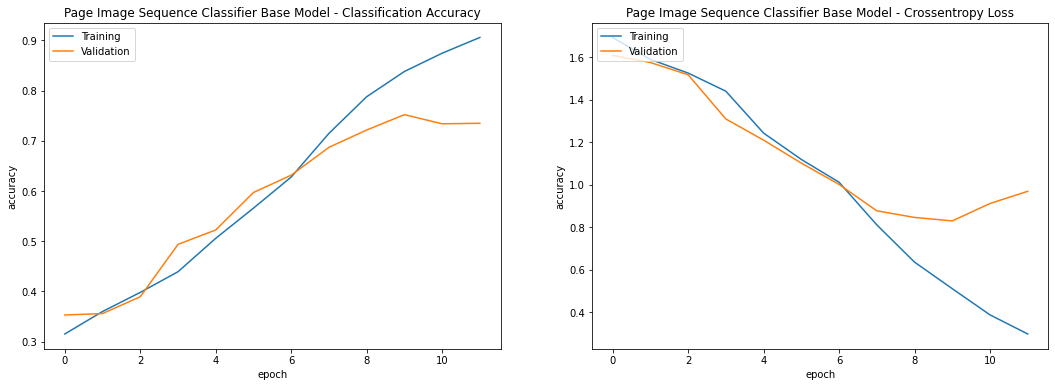

In [21]:
model_utils.plot_history(history, 'Page Image Sequence Classifier Base Model')

In [22]:
y_probs = lstm_cnn.predict(doc_data.image_test)
y_hat = np.argmax(y_probs, axis=-1)

In [7]:
y = np.argmax(doc_data.y_test, axis=-1)

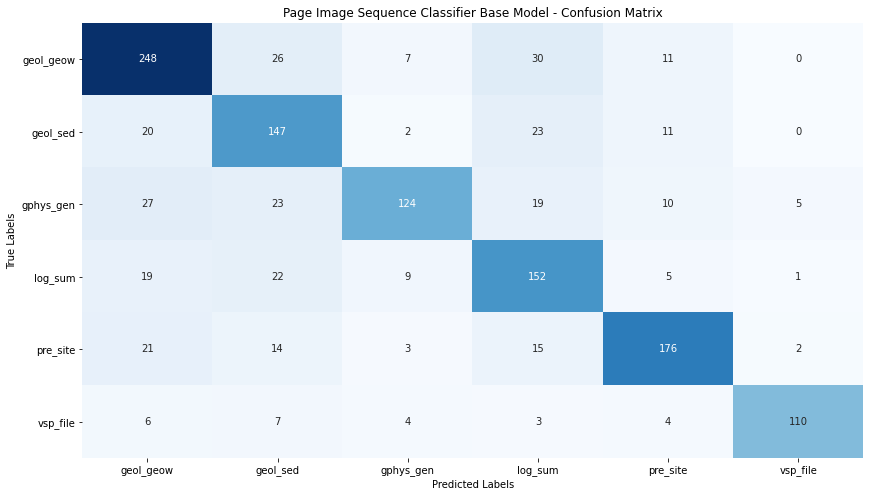

In [24]:
model_utils.confusion_matrix(y, y_hat, label_map, 'Page Image Sequence Classifier Base Model')

In [25]:
labels = [label for label in label_map]
print(metrics.classification_report(y, y_hat, target_names=labels))

              precision    recall  f1-score   support

   geol_geow       0.73      0.77      0.75       322
    geol_sed       0.62      0.72      0.67       203
   gphys_gen       0.83      0.60      0.69       208
     log_sum       0.63      0.73      0.68       208
    pre_site       0.81      0.76      0.79       231
    vsp_file       0.93      0.82      0.87       134

    accuracy                           0.73      1306
   macro avg       0.76      0.73      0.74      1306
weighted avg       0.75      0.73      0.73      1306



In [8]:
cnn_lstm_metrics = model_utils.iterate_training(models.image_cnn_lstm_model, doc_data, 10, y, data_type='image')

---- Training model iteration 0:
Epoch 1/100
131/131 - 39s - loss: 1.6641 - accuracy: 0.3476 - val_loss: 1.4680 - val_accuracy: 0.3962
Epoch 2/100
131/131 - 22s - loss: 1.4059 - accuracy: 0.4587 - val_loss: 1.3381 - val_accuracy: 0.5043
Epoch 3/100
131/131 - 20s - loss: 1.2548 - accuracy: 0.5186 - val_loss: 1.5318 - val_accuracy: 0.4115
Epoch 4/100
131/131 - 21s - loss: 1.1731 - accuracy: 0.5595 - val_loss: 1.1507 - val_accuracy: 0.5579
Epoch 5/100
131/131 - 21s - loss: 1.0242 - accuracy: 0.6239 - val_loss: 1.0707 - val_accuracy: 0.6077
Epoch 6/100
131/131 - 21s - loss: 0.9296 - accuracy: 0.6706 - val_loss: 0.9519 - val_accuracy: 0.6679
Epoch 7/100
131/131 - 21s - loss: 0.7640 - accuracy: 0.7388 - val_loss: 0.9076 - val_accuracy: 0.6947
Epoch 8/100
131/131 - 20s - loss: 0.6490 - accuracy: 0.7776 - val_loss: 0.9578 - val_accuracy: 0.6919
Epoch 9/100
131/131 - 21s - loss: 0.5159 - accuracy: 0.8262 - val_loss: 0.9365 - val_accuracy: 0.7167
41/41 [==============================] - 3s 83ms/

In [9]:
cnn_lstm_metrics

({'ave_precision': 0.7401602029505053,
  'ave_recall': 0.7154270398641218,
  'ave_f1_score': 0.7203792554785253,
  'ave_accuracy': 0.7099540710449219,
  'ave_loss': 0.879820030927658},)

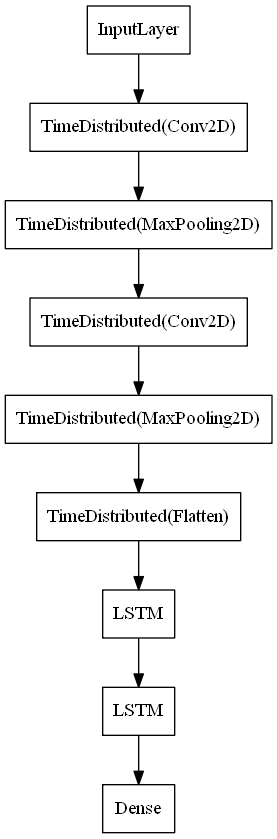

In [25]:
keras.utils.plot_model(lstm_cnn, show_layer_names=False, rankdir='TB')

In [11]:
bi_cnn_lstm_metrics

{'ave_precision': 0.7277611851305719,
 'ave_recall': 0.7095368322872575,
 'ave_f1_score': 0.7127726608782374,
 'ave_accuracy': 0.7025267958641053,
 'ave_loss': 0.8742063581943512}

In [10]:
bi_cnn_lstm_metrics = model_utils.iterate_training(models.image_cnn_lstm_model, doc_data, 10, y, data_type='image', model_params={'bi_directional': True})

---- Training model iteration 0:
Epoch 1/100
131/131 - 43s - loss: 1.6859 - accuracy: 0.3388 - val_loss: 1.4483 - val_accuracy: 0.4526
Epoch 2/100
131/131 - 26s - loss: 1.4221 - accuracy: 0.4379 - val_loss: 1.2344 - val_accuracy: 0.5407
Epoch 3/100
131/131 - 25s - loss: 1.1422 - accuracy: 0.5660 - val_loss: 1.1176 - val_accuracy: 0.5904
Epoch 4/100
131/131 - 25s - loss: 0.9651 - accuracy: 0.6464 - val_loss: 1.0476 - val_accuracy: 0.6230
Epoch 5/100
131/131 - 25s - loss: 0.7873 - accuracy: 0.7163 - val_loss: 0.9779 - val_accuracy: 0.6794
Epoch 6/100
131/131 - 25s - loss: 0.6309 - accuracy: 0.7709 - val_loss: 0.9716 - val_accuracy: 0.6727
Epoch 7/100
131/131 - 25s - loss: 0.4681 - accuracy: 0.8372 - val_loss: 0.9500 - val_accuracy: 0.7024
Epoch 8/100
131/131 - 24s - loss: 0.3521 - accuracy: 0.8803 - val_loss: 1.0330 - val_accuracy: 0.7062
Epoch 9/100
131/131 - 26s - loss: 0.2630 - accuracy: 0.9093 - val_loss: 0.9923 - val_accuracy: 0.7349
41/41 [==============================] - 4s 91ms/